In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_wine
data = load_wine()

In [7]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

### Como Funciona K-medoids:

1.  Inicialização:

    -   Escolha �K pontos de dados como os medoides iniciais (os "centros" dos clusters).
2.  Atribuição:

    -   Atribua cada ponto de dados ao medoide mais próximo, com base em uma medida de dissimilaridade (como a distância euclidiana).
3.  Atualização:

    -   Para cada cluster, selecione um novo medoide como o ponto de dados para o qual a soma das dissimilaridades entre este ponto e todos os outros pontos no cluster é mínima.
4.  Convergência:

    -   Repita os passos 2 e 3 até que os medoides não mudem, indicando que o algoritmo convergiu.
5.  Finalização:

    -   O resultado são �K clusters de pontos, com cada ponto pertencendo ao cluster cujo medoide está mais próximo.

### Parâmetros Principais de K-medoids:

1.  n_clusters:

    -   Número de clusters desejados.
2.  metric:

    -   Medida de dissimilaridade a ser usada (ex: 'euclidean', 'manhattan').
3.  init:

    -   Método para inicializar os medoides ('random', 'heuristic' ou array específico).
4.  max_iter:

    -   Máximo de iterações para otimizar os medoides.
5.  random_state:

    -   Semente para geração de números aleatórios, assegura repetibilidade.### 1\. PCA (Principal Component Analysis):

Passo 1: Centralização dos Dados

-   Os dados são centralizados subtraindo a média de cada característica (coluna) de todos os pontos de dados. Isso move o centro dos dados para a origem.

Passo 2: Cálculo da Matriz de Covariância

-   A matriz de covariância dos dados é calculada. Esta matriz expressa as relações entre as diferentes dimensões (variáveis) dos dados.

Passo 3: Cálculo dos Autovalores e Autovetores

-   Os autovalores e autovetores da matriz de covariância são calculados. Os autovetores representam direções no espaço de características original ao longo das quais os dados variam, e os autovalores indicam a magnitude dessa variação.

Passo 4: Ordenação dos Autovetores

-   Os autovetores são ordenados de acordo com os autovalores correspondentes, do maior para o menor. Cada autovetor se torna um componente principal.

Passo 5: Seleção de Componentes Principais e Formação da Matriz de Projeção

-   Os primeiros 'k' autovetores são selecionados, onde 'k' é o número de dimensões para as quais queremos reduzir os dados. Esses 'k' autovetores formam uma matriz de projeção.

Passo 6: Projeção dos Dados

-   Os dados centralizados são então projetados na matriz de projeção formada pelos autovetores selecionados, resultando em novas características que são combinações lineares das características originais.

Resumindo: O PCA identifica as direções (componentes principais) ao longo das quais os dados variam mais e projeta os dados nessas direções para reduzir a dimensionalidade.

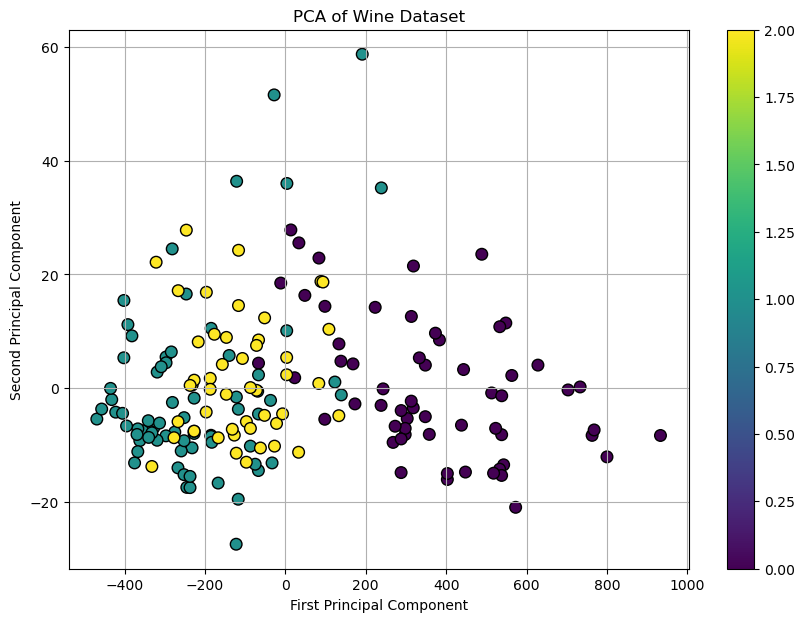

In [9]:
from sklearn.decomposition import PCA
X_pca= pca.fit_transform(X)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=70)
plt.colorbar()
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Wine Dataset')
plt.grid(True)
plt.show()

### 2\. t-SNE (t-Distributed Stochastic Neighbor Embedding):

Passo 1: Calculando Similaridades no Espaço de Alta Dimensão

-   Primeiro, para cada par de pontos nos dados, o t-SNE calcula uma medida de similaridade que representa o quanto esses pontos são "vizinhos próximos" uns dos outros nos dados originais.

Passo 2: Calculando Similaridades no Espaço de Baixa Dimensão

-   De maneira semelhante, no espaço de baixa dimensão (onde queremos mapear os pontos), para cada par de pontos, o t-SNE também calcula uma medida de "vizinhança".

Passo 3: Minimizando a Divergência

-   O t-SNE, então, tenta fazer com que as medidas de "vizinhança" no espaço de baixa dimensão sejam o mais parecidas possível com as medidas de "vizinhança" no espaço de alta dimensão. Ele faz isso através de um processo que envolve ajustar os pontos no espaço de baixa dimensão.

Passo 4: Otimização

-   O t-SNE usa técnicas de otimização para minimizar a diferença entre essas medidas de "vizinhança" nos espaços de alta e baixa dimensão, movendo os pontos no espaço de baixa dimensão até que essa diferença seja o menor possível.

Resumindo: O t-SNE busca encontrar uma representação de baixa dimensão dos dados onde as relações de proximidade entre os pontos sejam semelhantes às relações de proximidade nos dados originais de alta dimensão.

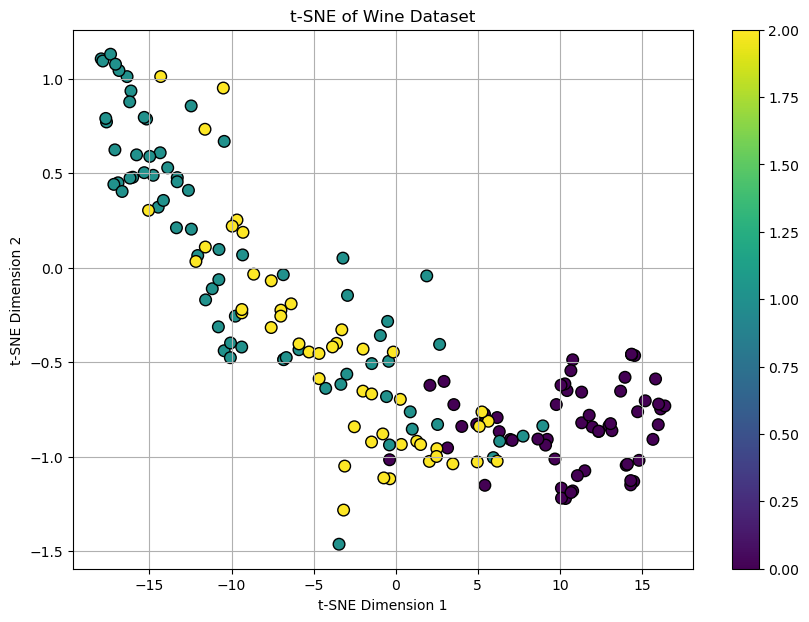

In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', s=70)
plt.colorbar()
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE of Wine Dataset')
plt.grid(True)
plt.show()

Ambas as técnicas são usadas para reduzir a dimensionalidade dos dados, facilitando assim a visualização e análise, mas funcionam de maneiras fundamentalmente diferentes e têm seus próprios pontos fortes e fracos.